In [1]:
!pwd

/panda/eedy/Kyushu/notebook


In [2]:
from mintpy.objects import ramp
from mintpy.utils import ptime, readfile, writefile
import h5py
import numpy as np
from matplotlib import pyplot as plt, colorbar, ticker, colors
from mintpy.utils import ptime, readfile, writefile
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [3]:
######### split

In [4]:
path_split = '../mintpy_ion_split_deramp/geo/geo_ion-split.h5'

In [5]:
timeseries_split = readfile.read(path_split, datasetName='timeseries')[0]
timeseries_split = np.squeeze(timeseries_split)
data_out, ramp = ramp.deramp(timeseries_split, mask_in=None, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [6]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_split = np.zeros(timeseries_split.shape[0])
slope_ion_split_dongxifangxiang = np.zeros(timeseries_split.shape[0])
slope_ion_split_nanbeifangxiang = np.zeros(timeseries_split.shape[0])
angle_deg_ion_split = np.zeros(timeseries_split.shape[0])
meta = readfile.read_attribute(path_split)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_split.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( mm(ion)/ km(juli)):', magnitude*1e6)
    print('The direction of the gradient is:', direction)

    slope_ion_split[i] = magnitude*1e6
    angle_deg_ion_split[i] = direction
    slope_ion_split_dongxifangxiang[i] = dx*1e6
    slope_ion_split_nanbeifangxiang[i] = dy*1e6

    print(i)


The equation of the fit plane is: Z = 0.0 * X + 0.0 * Y + -1e-323
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.0
The direction of the gradient is: 90.0
0
The equation of the fit plane is: Z = -1.5300933059557727e-05 * X + -9.05780249928153e-05 * Y + 0.030330805431771204
The magnitude of the gradient is( mm(ion)/ km(juli)): 1.1278136609415177
The direction of the gradient is: 273.93620680813467
1
The equation of the fit plane is: Z = 0.0012518760774730784 * X + -0.00044401795415147197 * Y + -0.00784525034851431
The magnitude of the gradient is( mm(ion)/ km(juli)): 8.399043921085063
The direction of the gradient is: 221.0478172672906
2
The equation of the fit plane is: Z = 0.0012372265651077504 * X + -0.00046340621240982793 * Y + -0.0038066878012277226
The magnitude of the gradient is( mm(ion)/ km(juli)): 8.504418365023435
The direction of the gradient is: 222.59963300263985
3
The equation of the fit plane is: Z = 0.0012366066738491758 * X + -0.00025467374305757924 * Y + -0.04

In [7]:
######### GIM

In [8]:
path_GIM = '../mintpy_ion_GIM_deramp/geo/geo_ion-GIM.h5'

In [9]:
timeseries_GIM = readfile.read(path_GIM, datasetName='timeseries')[0]
timeseries_GIM = np.squeeze(timeseries_GIM)
from mintpy.objects import ramp
data_out, ramp = ramp.deramp(timeseries_GIM, mask_in=None, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [10]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_GIM = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_dongxifangxiang = np.zeros(timeseries_split.shape[0])
slope_ion_GIM_nanbeifangxiang = np.zeros(timeseries_split.shape[0])
angle_deg_ion_GIM = np.zeros(timeseries_GIM.shape[0])
meta = readfile.read_attribute(path_GIM)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_GIM.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( mm(ion)/ km(juli)):', magnitude*1e6)
    print('The direction of the gradient is:', direction)

    slope_ion_GIM[i] = magnitude*1e6
    angle_deg_ion_GIM[i] = direction
    slope_ion_GIM_dongxifangxiang[i] = dx*1e6
    slope_ion_GIM_nanbeifangxiang[i] = dy*1e6

    print(i)


The equation of the fit plane is: Z = 0.0 * X + 0.0 * Y + -7e-323
The magnitude of the gradient is( mm(ion)/ km(juli)): 0.0
The direction of the gradient is: 90.0
0
The equation of the fit plane is: Z = -3.746989677031109e-05 * X + 0.0003217172334778859 * Y + -0.07312789952096603
The magnitude of the gradient is( mm(ion)/ km(juli)): 3.7527119388169545
The direction of the gradient is: 87.28878147478684
1
The equation of the fit plane is: Z = 1.2973645490049867e-05 * X + -0.0005417828192424993 * Y + 0.13234384271872413
The magnitude of the gradient is( mm(ion)/ km(juli)): 6.312920329327622
The direction of the gradient is: 269.4421675845681
2
The equation of the fit plane is: Z = 1.4321612572120718e-05 * X + -0.0005656355064206498 * Y + 0.13797187619570653
The magnitude of the gradient is( mm(ion)/ km(juli)): 6.590891641406004
The direction of the gradient is: 269.41017851503784
3
The equation of the fit plane is: Z = -5.5262120576953004e-05 * X + -8.937935190636986e-05 * Y + 0.03232601

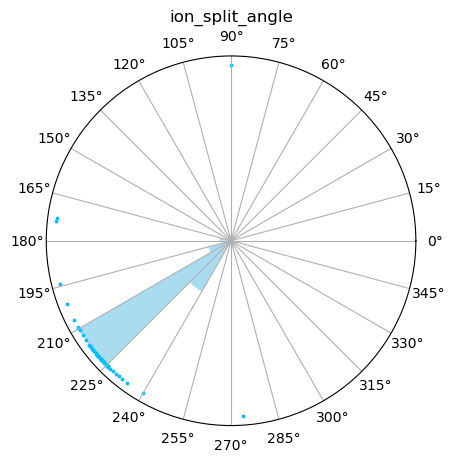

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# 转换为弧度
ion_split_angle_deg_rad = np.deg2rad(angle_deg_ion_split)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图
n, bins, _ = ax.hist(ion_split_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7, color='skyblue')

# 清除常规极坐标图的细节
ax.set_yticklabels([])  # 删除y轴标签
ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°', '270°','285°', '300°','315°', '330°','345°'])

ax.grid(True)  # 显示网格线
ax.set_title('ion_split_angle')

# 在圆盘的最外围绘制对应的点
ax.scatter(ion_split_angle_deg_rad, np.ones_like(ion_split_angle_deg_rad) * n.max(), color='deepskyblue', s=3)

plt.show()

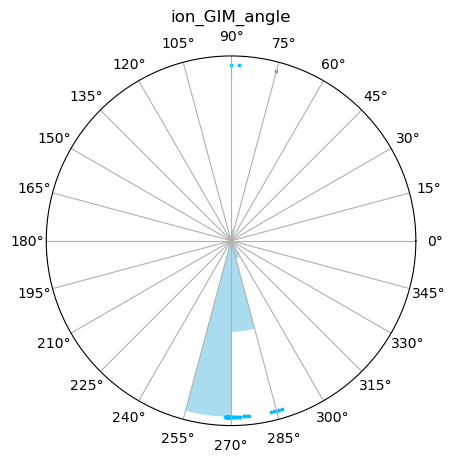

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# 转换为弧度
ion_GIM_angle_deg_rad = np.deg2rad(angle_deg_ion_GIM)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图
n, bins, _ = ax.hist(ion_GIM_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7, color='skyblue')

# 清除常规极坐标图的细节
ax.set_yticklabels([])  # 删除y轴标签
ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°', '270°','285°', '300°','315°', '330°','345°'])
ax.grid(True)  # 显示网格线
ax.set_title('ion_GIM_angle')

# 在圆盘的最外围绘制对应的点
ax.scatter(ion_GIM_angle_deg_rad, np.ones_like(ion_GIM_angle_deg_rad) * n.max(), color='deepskyblue', s=3)

plt.show()

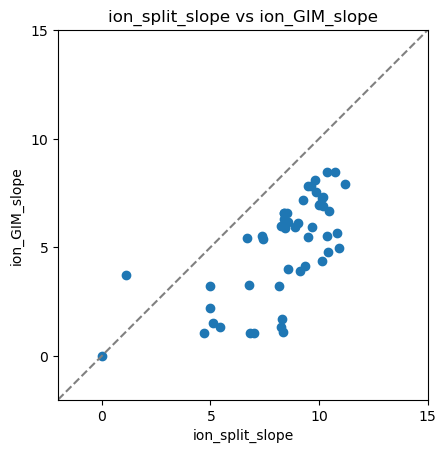

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split, slope_ion_GIM)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope')
plt.ylabel('ion_GIM_slope')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 15]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=5))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

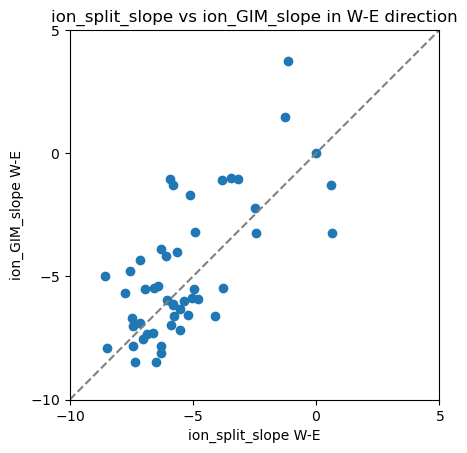

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_dongxifangxiang, slope_ion_GIM_dongxifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope W-E')
plt.ylabel('ion_GIM_slope W-E')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope in W-E direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-10, 5]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=5))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

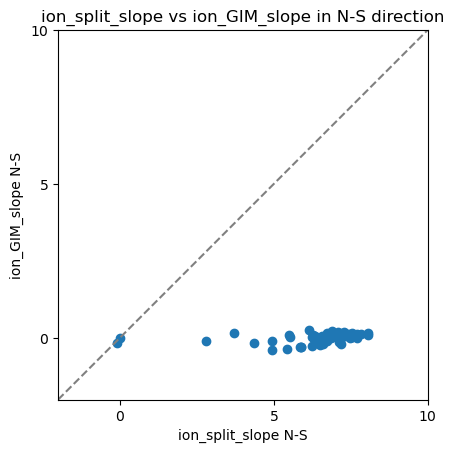

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_nanbeifangxiang, slope_ion_GIM_nanbeifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope N-S')
plt.ylabel('ion_GIM_slope N-S')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope in N-S direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 10]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=5))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

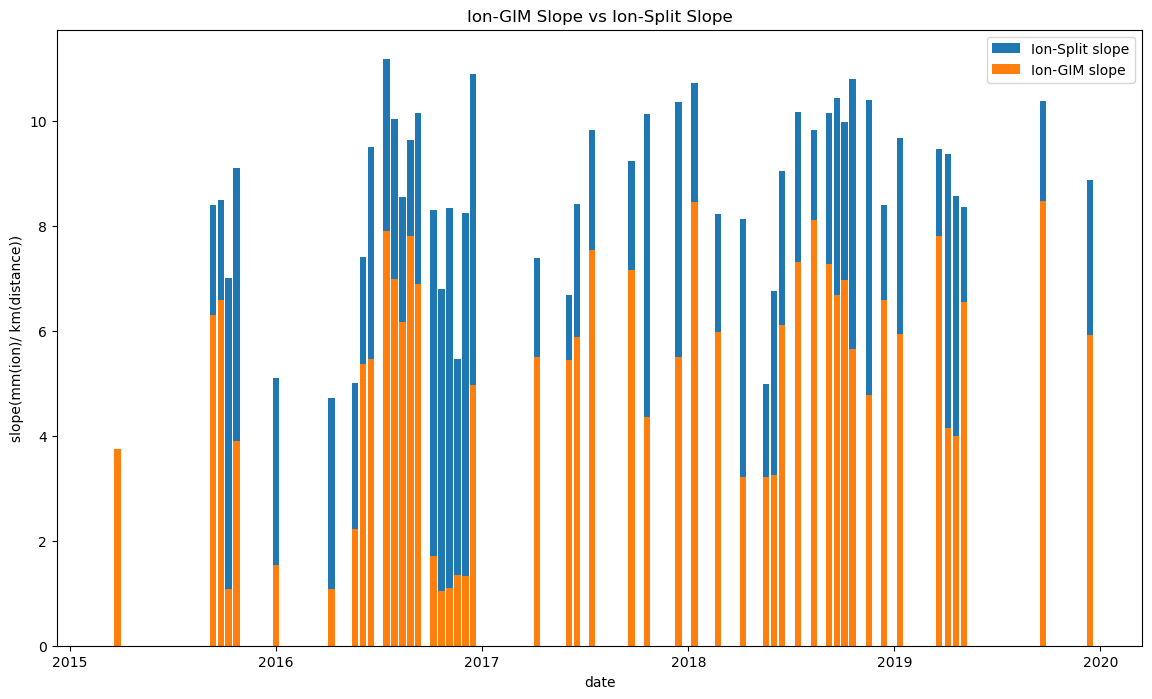

In [14]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_GIM, 'r') as file:
    date_GIM = file['date']
    date_GIM = date_GIM[()]
date_GIM = np.char.decode(date_GIM)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_GIM]
month = [int(date[4:6]) for date in date_GIM]
day = [int(date[6:8]) for date in date_GIM]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split, width, label='Ion-Split slope', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM, width, label='Ion-GIM slope', alpha=1)  # 增加一个宽度的偏移量

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope(mm(ion)/ km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope')
ax.legend()

plt.show()

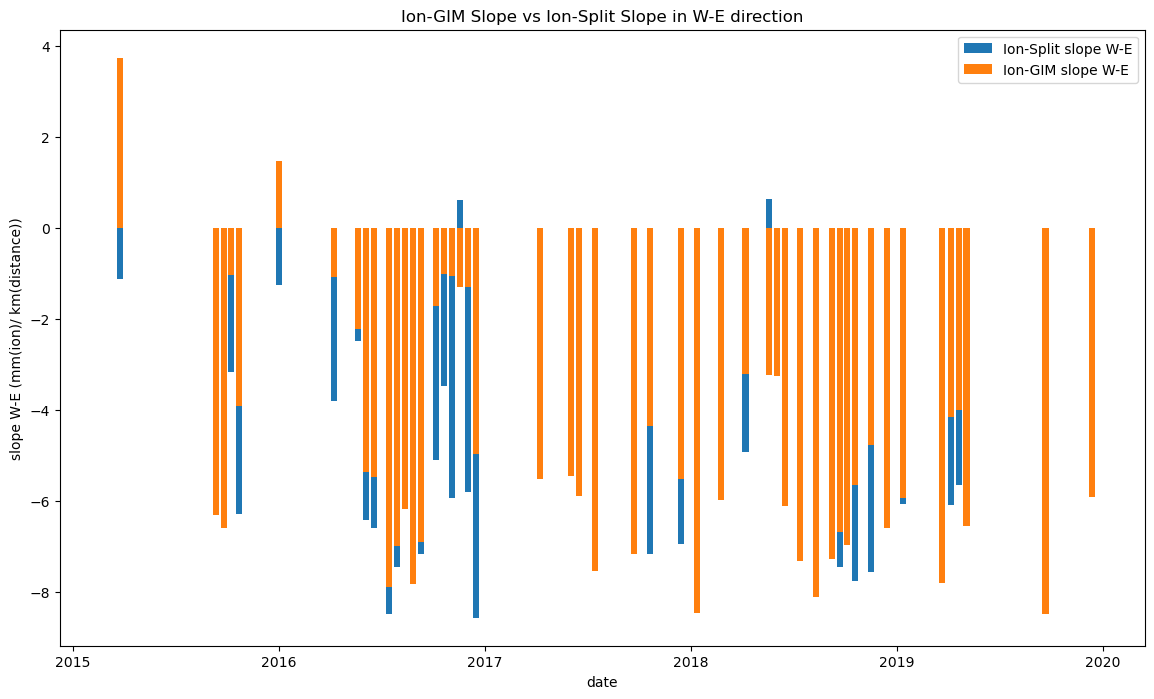

In [16]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_GIM, 'r') as file:
    date_GIM = file['date']
    date_GIM = date_GIM[()]
date_GIM = np.char.decode(date_GIM)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_GIM]
month = [int(date[4:6]) for date in date_GIM]
day = [int(date[6:8]) for date in date_GIM]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_dongxifangxiang, width, label='Ion-Split slope W-E', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_dongxifangxiang, width, label='Ion-GIM slope W-E', alpha=1)  # 增加一个宽度的偏移量

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope W-E (mm(ion)/ km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope in W-E direction')
ax.legend()

plt.show()

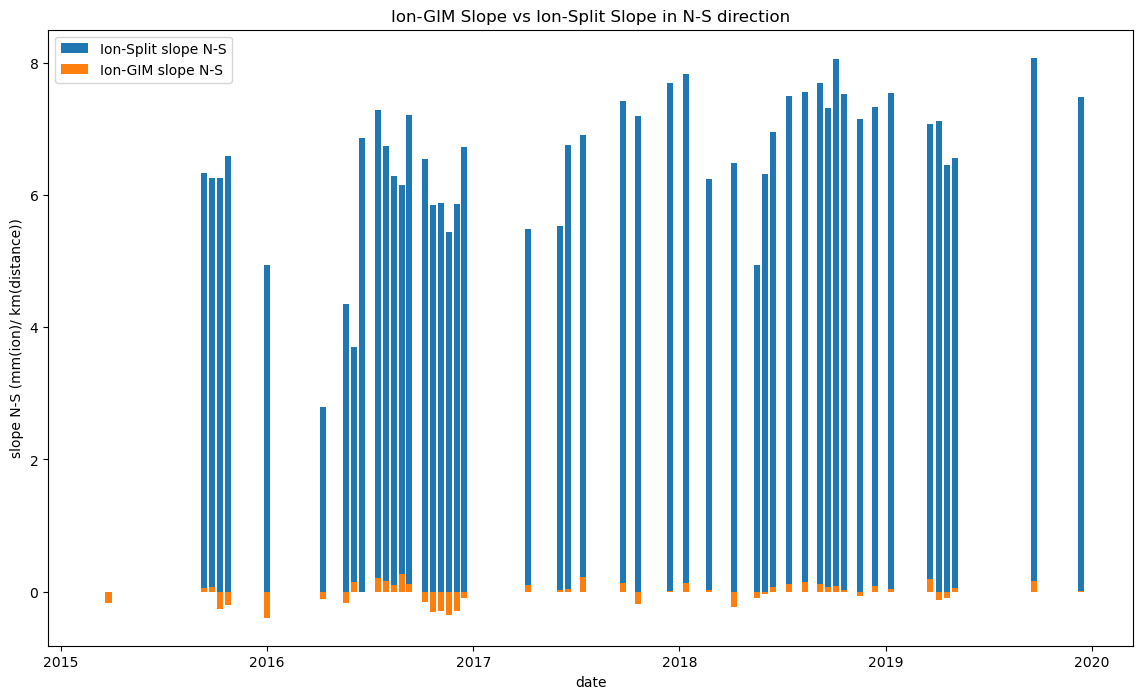

In [17]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_GIM, 'r') as file:
    date_GIM = file['date']
    date_GIM = date_GIM[()]
date_GIM = np.char.decode(date_GIM)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_GIM]
month = [int(date[4:6]) for date in date_GIM]
day = [int(date[6:8]) for date in date_GIM]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_nanbeifangxiang, width, label='Ion-Split slope N-S', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_nanbeifangxiang, width, label='Ion-GIM slope N-S', alpha=1)  # 增加一个宽度的偏移量

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope N-S (mm(ion)/ km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope in N-S direction')
ax.legend()

plt.show()

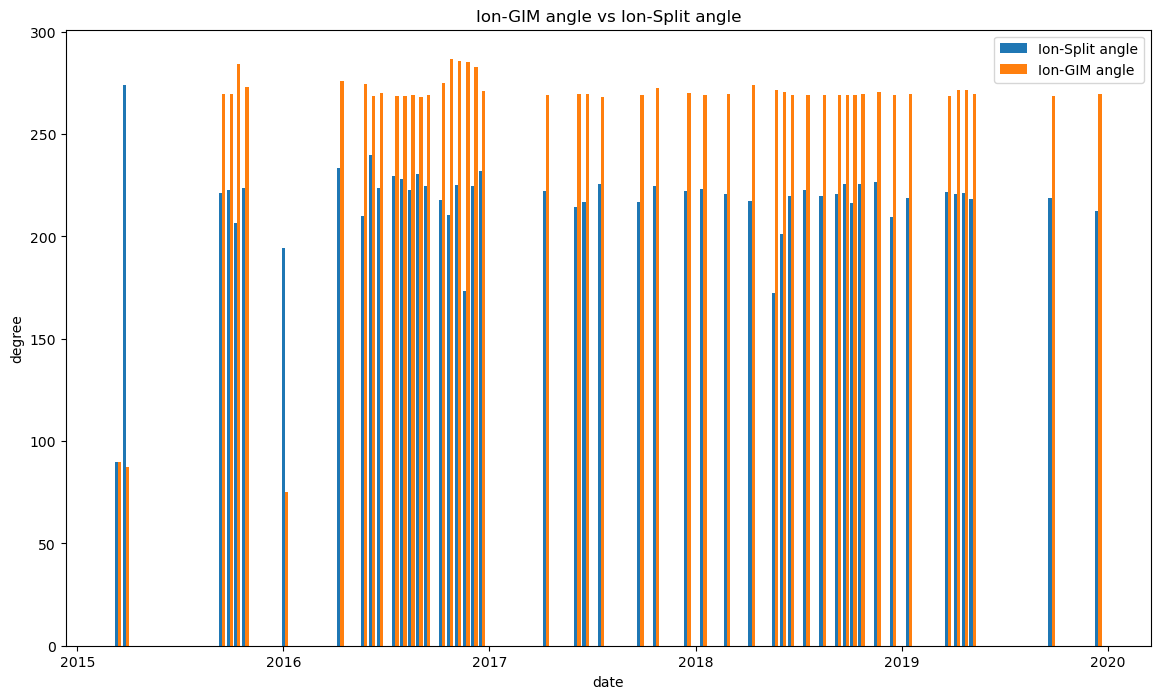

In [15]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_GIM, 'r') as file:
    date_GIM = file['date']
    date_GIM = date_GIM[()]
date_GIM = np.char.decode(date_GIM)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.015  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_GIM]
month = [int(date[4:6]) for date in date_GIM]
day = [int(date[6:8]) for date in date_GIM]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, angle_deg_ion_split, width, label='Ion-Split angle', alpha=1)
ax.bar(np.array(date_GIM_numeric) + width, angle_deg_ion_GIM, width, label='Ion-GIM angle', alpha=1)  # 增加一个宽度的偏移量

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('degree')
ax.set_title('Ion-GIM angle vs Ion-Split angle')
ax.legend()

plt.show()